In [1]:
##Question 1.1 Extracting Information From My Own Transaction

In [2]:
import json
import requests

Blockdetail = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/684079")
transactiononchain = json.loads(Blockdetail.text)

In [3]:
print(transactiononchain['txcount'])

1290


In [4]:
print(transactiononchain['time'])

1619133781


In [5]:
### Converting unix timestamp into human readable format

In [6]:
import datetime
timestamp = datetime.datetime.fromtimestamp(transactiononchain['time'])
print(timestamp.strftime('%Y-%m-%d %H:%M'))

2021-04-23 00:23


In [7]:
print(transactiononchain['totalFees'])

0.0028180600000000666


In [8]:
print(transactiononchain['confirmations'])

2883


In [9]:
print(transactiononchain['miner'])

taal.com


In [10]:
##Question 1.2 Extracting Information from Famous Blocks

In [11]:
import json
import requests

Blockdetail = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/170")
firstevertransaction = json.loads(Blockdetail.text)

In [12]:
print(firstevertransaction['time'])

1231731025


In [13]:
import datetime
timestamp = datetime.datetime.fromtimestamp(firstevertransaction['time'])
print(timestamp.strftime('%Y-%m-%d %H:%M'))

2009-01-12 03:30


In [14]:
##Question 1.2 The Pizza purchase for 10,000BTC in 2010

In [15]:
import json
import requests

Blockdetail = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/170")
pizzapurchase = json.loads(Blockdetail.text)

In [16]:
print(pizzapurchase['time'])

1231731025


In [17]:
import datetime
timestamp = datetime.datetime.fromtimestamp(pizzapurchase['time'])
print(timestamp.strftime('%Y-%m-%d %H:%M'))

2009-01-12 03:30


In [18]:
##Question 2.1

In [22]:
import pandas as pd
from fredapi import Fred
fred = Fred(api_key='0a608fe4a2928d898eacdb02efa83c84')

<AxesSubplot:>

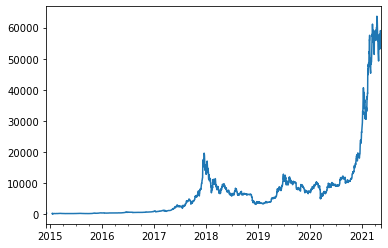

In [20]:
Bitcoin = fred.get_series('CBBTCUSD')
Bitcoin.plot()

<AxesSubplot:>

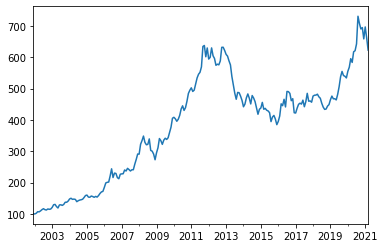

In [73]:
GoldPrice = fred.get_series('ID7108')
GoldPrice.plot()

<AxesSubplot:>

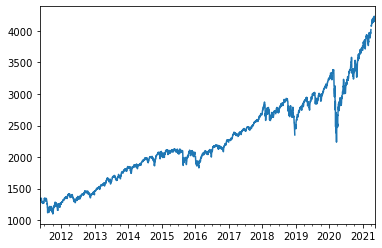

In [74]:
Market = fred.get_series('SP500')
Market.plot()

<AxesSubplot:>

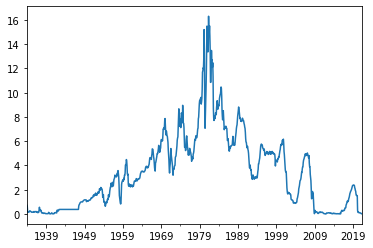

In [75]:
Riskfreerate = fred.get_series('TB3MS')
Riskfreerate.plot()

In [76]:
##Question 2.2

In [77]:
dataframe= pd.concat([Bitcoin, GoldPrice, Market, Riskfreerate], axis=1)
dataframe

,0,1,2,3
1934-01-01,NaN,NaN,NaN,0.72
1934-02-01,NaN,NaN,NaN,0.62
1934-03-01,NaN,NaN,NaN,0.24
1934-04-01,NaN,NaN,NaN,0.15
1934-05-01,NaN,NaN,NaN,0.16
...,...,...,...,...
2021-05-07,57373.88,NaN,4232.60,NaN
2021-05-08,59045.17,NaN,NaN,NaN
2021-05-09,58410.34,NaN,NaN,NaN
2021-05-10,55936.77,NaN,4188.43,NaN


In [78]:
dataframe.columns = ('Bitcoin', 'GoldPrice', 'Market', 'Riskfreerate')
dataframe

,Bitcoin,GoldPrice,Market,Riskfreerate
1934-01-01,NaN,NaN,NaN,0.72
1934-02-01,NaN,NaN,NaN,0.62
1934-03-01,NaN,NaN,NaN,0.24
1934-04-01,NaN,NaN,NaN,0.15
1934-05-01,NaN,NaN,NaN,0.16
...,...,...,...,...
2021-05-07,57373.88,NaN,4232.60,NaN
2021-05-08,59045.17,NaN,NaN,NaN
2021-05-09,58410.34,NaN,NaN,NaN
2021-05-10,55936.77,NaN,4188.43,NaN


In [79]:
dataframe.to_csv('dataanalysis.csv')

In [80]:
dataframe = dataframe.loc['2016-01-01':'2021-04-01']

In [81]:
dataframe.to_csv('dataanalysis.csv')

In [82]:
dataframe = dataframe.fillna(method='ffill')

In [83]:
dataframe.to_csv('dataanalysis.csv')

In [84]:
dataframe = dataframe[dataframe.index.day==1]
dataframe

,Bitcoin,GoldPrice,Market,Riskfreerate
2016-01-01,435.66,395.0,NaN,0.26
2016-02-01,371.33,412.4,1939.38,0.31
2016-03-01,433.08,451.2,1978.35,0.29
2016-04-01,417.68,445.4,2072.78,0.23
2016-05-01,456.98,465.7,2065.30,0.27
...,...,...,...,...
2020-12-01,18763.35,658.5,3662.45,0.09
2021-01-01,29391.09,696.6,3756.07,0.08
2021-02-01,33457.60,661.7,3773.86,0.04
2021-03-01,49652.19,622.7,3901.82,0.03


In [85]:
import numpy as np

In [86]:
dataframe['log_(Bitcoin/Bitcoint-1)'] = np.log(dataframe['Bitcoin']/dataframe['Bitcoin'].shift(1))
dataframe['log_(GoldPrice/GoldPricet-1)'] = np.log(dataframe['GoldPrice']/dataframe['GoldPrice'].shift(1))
dataframe['log_(Market/Markett-1)'] = np.log(dataframe['Market']/dataframe['Market'].shift(1))
dataframe['Riskfreerate/1200']=dataframe['Riskfreerate']/1200

In [87]:
dataframe = dataframe.drop(dataframe.index[0])

In [88]:
BitcoinReturns = dataframe['log_(Bitcoin/Bitcoint-1)']
BitcoinReturns

2016-02-01   -0.159771
2016-03-01    0.153831
2016-04-01   -0.036207
2016-05-01    0.089924
2016-06-01    0.157328
                ...   
2020-12-01    0.308359
2021-01-01    0.448786
2021-02-01    0.129587
2021-03-01    0.394764
2021-04-01    0.168569
Name: log_(Bitcoin/Bitcoint-1), Length: 63, dtype: float64

In [89]:
GoldPriceReturns = dataframe['log_(GoldPrice/GoldPricet-1)']
GoldPriceReturns

2016-02-01    0.043108
2016-03-01    0.089917
2016-04-01   -0.012938
2016-05-01    0.044569
2016-06-01   -0.053817
                ...   
2020-12-01   -0.053372
2021-01-01    0.056247
2021-02-01   -0.051399
2021-03-01   -0.060747
2021-04-01    0.000000
Name: log_(GoldPrice/GoldPricet-1), Length: 63, dtype: float64

In [90]:
MarketReturns = dataframe['log_(Market/Markett-1)']
MarketReturns

2016-02-01         NaN
2016-03-01    0.019895
2016-04-01    0.046628
2016-05-01   -0.003615
2016-06-01    0.016343
                ...   
2020-12-01    0.113355
2021-01-01    0.025241
2021-02-01    0.004725
2021-03-01    0.033345
2021-04-01    0.029806
Name: log_(Market/Markett-1), Length: 63, dtype: float64

In [91]:
RiskfreerateReturns = dataframe['Riskfreerate/1200']
RiskfreerateReturns

2016-02-01    0.000258
2016-03-01    0.000242
2016-04-01    0.000192
2016-05-01    0.000225
2016-06-01    0.000225
                ...   
2020-12-01    0.000075
2021-01-01    0.000067
2021-02-01    0.000033
2021-03-01    0.000025
2021-04-01    0.000017
Name: Riskfreerate/1200, Length: 63, dtype: float64

In [92]:
##Question 2.3

In [93]:
Bitcoin_Gold_correl = BitcoinReturns.corr(GoldPriceReturns)
Bitcoin_Gold_correl

0.1681736232527188

In [94]:
Bitcoin_Market_correl = BitcoinReturns.corr(MarketReturns)
Bitcoin_Market_correl

0.19938792215789272

In [95]:
##Estimating α and β for Bitcoin and Gold using OLS regression

In [96]:
y = BitcoinReturns-RiskfreerateReturns
x = GoldPriceReturns-RiskfreerateReturns

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
y = y.values.reshape(-1,1)
x = x.values.reshape(-1,1)

In [99]:
lr = LinearRegression()

In [100]:
lr.fit(x,y)
print(lr.intercept_, lr.coef_)

[0.07088279] [[0.95918482]]


In [101]:
## α for Bitcoin and Gold is 0.07470803 and 
## β for Bitcoin and Gold is 1.05699897

In [102]:
##Question 3.1

Sarunas fintech firm provides loans to customers, but you know more importantly it collects data of customer loans, and critically analyse that data to provide loans in future. It also helps to know us how much customer should get loan, whether they'll able to pay or not, if yes then by when,etc. It will help them to alter their lending terms and policies as per customers and the firms need. This will Eventually help in making remarkable profit as a Fintech firm. The four structual part of Sarunas fintech firm's app are Streamlit, Postgres Database, Fastapi, Jupiter lab. Streamlit is a customer operating system, it helps customer to file application by filling up their details. Postgres Database stores every details filled by customers and also every request and responses of customers and firm. Fastapi helps to run statstical regressions. Jupiter lab helps to analyse all the data and after performing regression to give final ressults. So, basically the process is Customers fills their details in Streamlit and their details get stored in Postgres Databse, then with the help of Fastapi- statistical regression model is run and then with the help of Jupiter notebook the results extracted from regression model is analysed and it also deals with both structural and unstructural data and then decisions are made on customers requests. 

In [ ]:
##Question 3.2

In [109]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

**Data Taken From:** https://www.kaggle.com/wordsforthewise/lending-club </br>
**Model is From:** https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression

In [110]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [111]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

In [113]:
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [114]:
full_set = full_set.dropna(subset=['emp_length'])

# Build the model - Logistic Regression

1. Transform our Label *loan_status* and other columns

In [115]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

In [116]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

**Build Model**

In [117]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [118]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

In [120]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [121]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [122]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

ROC-AUC-score:  0.634209472479741


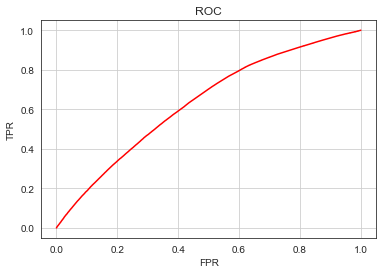

In [123]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [124]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [125]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [126]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

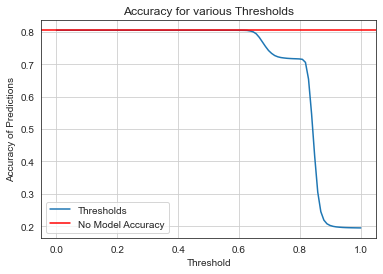

In [127]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [128]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

In [129]:
with open('app/model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

FileNotFoundError: [Errno 2] No such file or directory: 'app/model.pkl'

In [130]:
model = pickle.load(
    open('app/model.pkl', 'rb')
)

FileNotFoundError: [Errno 2] No such file or directory: 'app/model.pkl'

In [ ]:
##Question 3.3

This model could be improve by providing customers an option to recorrect the data they have already submitted. Then their should be an option where customers can raise a ticket by which they will get to know about their application progess or else if they have any query regarding anything than they can raise from their.